# 1.성능향상

In [1]:
# 라이브러리 
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

--------------------------------

# 2.EDA

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

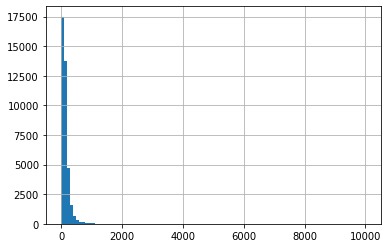

In [8]:
# target(hist)
train['price'].hist(bins=100)

In [9]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [11]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [12]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [13]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [14]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [15]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

In [16]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

-----------------------------------

# 3.여러 회귀 계수값

In [17]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32000.4623726053

In [18]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.06762e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


32002.921365825365

### coef 변수로 알파값을 조정하여 회귀계수값을 낮출수 있는 효과가 있다는 걸 인지함.

In [19]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
host_id,2.368097e-08
latitude,2.083514e+02
longitude,-7.948728e+02
minimum_nights,1.120975e-01
number_of_reviews,-2.332537e-01
reviews_per_month,-3.574521e+00
calculated_host_listings_count,6.688200e-02
availability_365,1.924192e-01


In [20]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
del model
del pred
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32695.606216284894

In [21]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
del model
del pred
model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

33521.06875602843

In [22]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
del model
del pred
model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31446.66249631902

In [23]:
# Xgboost
from xgboost import XGBRegressor
del model
del pred
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


31838.531510528188

In [24]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
from sklearn.metrics import mean_squared_error
del model
del pred
model = XGBRegressor(max_depth=6,
                     learning_rate=0.1,
                     n_estimators=100,
                     random_state=20)
model.fit(X_train, y_train)
pred = model.predict(test)
mean_squared_error(y_test, pred)

47409.81292076754

#### max_depth값이 5일때 48125, 7일때 48190 값이 나와서 기본값일때 47409로 최상의 값을 찾음.
#### learning_rate값이0. 2일때 48703, 0.05일때 48047 이므로 기본값 일때 47409로 최상의 값임.
#### n_estimators값이 500일때 48440, 400일때 48451, 300일때 48197, 200일때 47778 이므로 기본값일때 최상의 값임.

---------------------------

# 4.교차검증

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([ 0.05228543,  0.10222182, -0.03357961,  0.09738655,  0.13072633])

In [26]:
scores.mean()

0.06980810406162977

In [27]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)
del scores
scores = cross_val_score(model, X_train, y_train, cv=kfold)
scores

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([-0.08803847,  0.13638352, -0.0149348 ,  0.04121225,  0.14505088])

In [28]:
scores.mean()

0.0439346754269266

---------------------

# 5.평가

In [29]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

76.24955502241737

In [30]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

47409.81292076754

In [31]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

217.73794552343773

In [33]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.1315786695290203

-------------------

# 회고

### max_depth, learning_rate, n_estimators, random_state 값을 조정하여 계수값을 낮춰 보다 나은 모델로 만들수 있었다.

### 메모리 부족으로 커널이 계속 리스타팅되는 현상이 발생되어 각 회귀코드마다 del문을 활용하여 각 변수를 초기화한후 해결함.

### 교차검증을 통해서 학습 중 검증과 수정을 수행하였음.

### 머신러닝에 있어 데이터들을 input하여 output에 이르기까지의 과정들을 살펴보며 그 과정들이 어떤 효과를 나타낼수 있는지에 대해 깊게 고민할수 있는 시간이었음.

### 아직 전체적인 과정틀이나 코드사용 및 결과값에 대해 전체적으로 이해하지 못하였으나, 지속적인 반복학습을 통해 머신러닝을 보다 쉽게 사용할수 있게끔 공부해야겠다는 생각이 듬.